#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 06 - Part 06 - Pandas</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

# Pandas
* Library for dealing with tabular data in a database-like way
* Provides facilities for manipulating columns, setting types per column, and interfacing with numpy and matplotlib

* A `Series` is a column of data, `DataFrame` a full table
* Tables of numbers can be loaded straight from numpy:

In [79]:
import pandas as pd

dat = pd.DataFrame(np.random.randint(0, 10, size=(6, 6)))

dat

,0,1,2,3,4,5
0,4,6,5,3,2,1
1,7,3,7,8,0,3
2,1,8,6,2,5,5
3,2,4,7,0,2,6
4,6,4,2,6,4,4
5,7,7,7,7,9,6


<IPython.core.display.Javascript object>

Pandas provides a number of facilities for plotting with matplotlib:

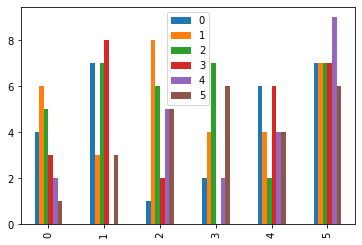

<IPython.core.display.Javascript object>

In [80]:
dat.plot.bar()

A number of plots make sense for statistical data in particular:

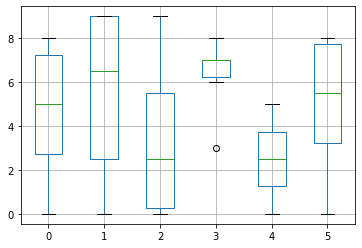

In [23]:
dat.boxplot()

* Series can be accessed by index:

In [81]:
series = dat[0]
print(type(series), series.name, series.dtype, np.asarray(series))
print(series)

<class 'pandas.core.series.Series'> 0 int64 [4 7 1 2 6 7]
0    4
1    7
2    1
3    2
4    6
5    7
Name: 0, dtype: int64


<IPython.core.display.Javascript object>

* Rows accessed in different ways, eg. as Series:

In [82]:
row1 = dat.loc[1]
print(type(row1), row1.name, row1.dtype, np.asarray(row1))
row1

<class 'pandas.core.series.Series'> 1 int64 [7 3 7 8 0 3]


0    7
1    3
2    7
3    8
4    0
5    3
Name: 1, dtype: int64

<IPython.core.display.Javascript object>

* Column and row names can be set:

In [83]:
pd.DataFrame(
    data=np.random.randint(0, 10, size=(5, 4)),
    columns=["one", "two", "three", "four"],
    index=["r0", "r1", "r2", "r3", "r4"],
    dtype=np.float32,
)

,one,two,three,four
r0,1.0,1.0,6.0,7.0
r1,1.0,5.0,3.0,7.0
r2,4.0,7.0,6.0,2.0
r3,5.0,5.0,9.0,0.0
r4,7.0,0.0,9.0,5.0


<IPython.core.display.Javascript object>

* Columns can be provided as objects:

In [84]:
dmap = {
    "one": np.ones((4,), dtype=np.int8), 
    "two": np.ones((4,), dtype=np.float32) * 2
}

pd.DataFrame(dmap)

,one,two
0,1,2.0
1,1,2.0
2,1,2.0
3,1,2.0


<IPython.core.display.Javascript object>

* Converting to numpy can be done with the `np.asarray` function
* This will convert column types to match as numpy arrays are homogeneous:

In [28]:
np.asarray(pd.DataFrame(dmap))

array([[1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.]], dtype=float32)

* Various functions exist for manipulating data in tables, eg. `Series.map`:

In [85]:
# apply map to column 2
dat[2].map(lambda i: i > 3)

0     True
1     True
2     True
3     True
4    False
5     True
Name: 2, dtype: bool

<IPython.core.display.Javascript object>

* `DataFrame.applymap` can be applied to a whole table:

In [30]:
dat.applymap(lambda i: i > 3)

,0,1,2,3,4,5
0,False,False,False,True,False,True
1,False,False,True,True,False,True
2,True,True,True,True,False,False
3,True,True,True,True,True,True
4,True,True,False,False,False,True
5,True,True,False,True,True,False


* Loading from CSV files is common for tabular data, eg. load some stock price information:

In [27]:
df=pd.read_csv("stocks.csv")
df

,date,symbol,open,high,low,close,volume
0,2019-03-01,AMZN,1655.13,1674.26,1651.00,1671.73,4974877
1,2019-03-04,AMZN,1685.00,1709.43,1674.36,1696.17,6167358
2,2019-03-05,AMZN,1702.95,1707.80,1689.01,1692.43,3681522
3,2019-03-06,AMZN,1695.97,1697.75,1668.28,1668.95,3996001
4,2019-03-07,AMZN,1667.37,1669.75,1620.51,1625.95,4957017
5,2019-03-01,AAPL,174.28,175.15,172.89,174.97,25886167
6,2019-03-04,AAPL,175.69,177.75,173.97,175.85,27436203
7,2019-03-05,AAPL,175.94,176.00,174.54,175.53,19737419
8,2019-03-06,AAPL,174.67,175.49,173.94,174.52,20810384
9,2019-03-07,AAPL,173.87,174.44,172.02,172.50,24796374


* A new column can be added to compute the difference between and closing and opening prices for each value:

In [86]:
df["diff"] = df["close"] - df["open"]
df

,date,symbol,open,high,low,close,volume,diff
0,2019-03-01,AMZN,1655.13,1674.26,1651.00,1671.73,4974877,16.60
1,2019-03-04,AMZN,1685.00,1709.43,1674.36,1696.17,6167358,11.17
2,2019-03-05,AMZN,1702.95,1707.80,1689.01,1692.43,3681522,-10.52
3,2019-03-06,AMZN,1695.97,1697.75,1668.28,1668.95,3996001,-27.02
4,2019-03-07,AMZN,1667.37,1669.75,1620.51,1625.95,4957017,-41.42
5,2019-03-01,AAPL,174.28,175.15,172.89,174.97,25886167,0.69
6,2019-03-04,AAPL,175.69,177.75,173.97,175.85,27436203,0.16
7,2019-03-05,AAPL,175.94,176.00,174.54,175.53,19737419,-0.41
8,2019-03-06,AAPL,174.67,175.49,173.94,174.52,20810384,-0.15
9,2019-03-07,AAPL,173.87,174.44,172.02,172.50,24796374,-1.37


<IPython.core.display.Javascript object>

* Operators can be applied to data frames and series, like Numpy these produces data structures of results rather than scalar values:

In [93]:
df["diff"] >= 0  # days where stocks went up during trading

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14    False
Name: diff, dtype: bool

<IPython.core.display.Javascript object>

* Series like this can be used to select rows in a data frame:

In [95]:
df[df["diff"] >= 0]  # filtered data frame with only positive trading days

,date,symbol,open,high,low,close,volume,diff
0,2019-03-01,AMZN,1655.13,1674.26,1651.00,1671.73,4974877,16.60
1,2019-03-04,AMZN,1685.00,1709.43,1674.36,1696.17,6167358,11.17
5,2019-03-01,AAPL,174.28,175.15,172.89,174.97,25886167,0.69
6,2019-03-04,AAPL,175.69,177.75,173.97,175.85,27436203,0.16
10,2019-03-01,GOOG,1124.90,1142.97,1124.75,1140.99,1450316,16.09
11,2019-03-04,GOOG,1146.99,1158.28,1130.69,1147.80,1446047,0.81
12,2019-03-05,GOOG,1150.06,1169.61,1146.19,1162.03,1443174,11.97


<IPython.core.display.Javascript object>

* `DataFrame.pivot` is used to reorder data by selecting a column as a row index, a column of identifiers (or any relatively small set of values) to be the new columns, and the values to distribute across those columns:

In [87]:
dfp = df.pivot(index="date", columns="symbol", values="diff")
dfp

symbol,AAPL,AMZN,GOOG
date,,,
2019-03-01,0.69,16.60,16.09
2019-03-04,0.16,11.17,0.81
2019-03-05,-0.41,-10.52,11.97
2019-03-06,-0.15,-27.02,-4.63
2019-03-07,-1.37,-41.42,-12.42


<IPython.core.display.Javascript object>

* Summing the columns gives the total change in price during trading:

In [59]:
dfp.sum()

symbol
AAPL    -1.08
AMZN   -51.19
GOOG    11.82
dtype: float64

## What We're Not Covering
* Many more Python libraries out there for specific tasks or scientific areas, such as:
  * Seaborn: even prettier graphs with table data and other features
  * Xarray: N-D labeled arrays and datasets 
  * Sympy: symbolic math, reducing expressions, finding equations solutions as expressions of symbols
  * Scipy: large collection of mathematical functions and utilities for image manipulation, signal processsing, optimization, interpolation, etc.
  * scikit-learn: machine learning models, datasets, utilities
  * Pytorch, Tensorflow: deep learning
  * DASK: parallel computing
  * SimpleITK, Python-ITK: image analysis

# That's it!